In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as polt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy import interpolate

In [36]:
experiment: dict[str, dict[str, dict[float, float]]] =\
    {
  "tension_distribution": {
    "short_circuit": {
        17: 20,
        18: 910,
        19: 1700,
        20: 2140,
        21: 2410,
        22: 1740,
        23: 10,
        24: 920,
        25: 1750,
        26: 2180,
        29: 10,
        34.8: 10
    },
    "open": {
        30: 870,
        31: 830,
        32: 950,
        33: 1080,
        34: 1140,
        35: 1050,
        36: 870,
        37: 820,
        38: 940
    }
  },
  "radiation_pattern": {
    "megaphone": {
      0: 229,
      10: 193,
      20: 54,
      30: 14,
      40: 2
    }
  },
  "polarization": {
    "gauze": {
      0: 4.4,
      10: 4.5,
      20: 4.8,
      30: 6,
      40: 8.4,
      50: 17.2,
      60: 37.2,
      70: 66.4,
      80: 82,
      90: 86.8,
      100: 73.2,
      110: 42.4,
      120: 20.8,
      130: 13.2,
      140: 5.2,
      150: 4,
      160: 2.4,
      170: 3,
      180: 3.6
    }
  },
  "total_internal_reflection": {
    "prism": {
        0: 57.6,
        1: 59.6,
        2: 49.6,
        3: 31.2,
        4: 19.6,
        5: 11.6,
        6: 7.2,
        7: 3.6,
        8: 2.8,
        9: 1,
        10: 0.6,
        11: 0.2
    }
  },
  "wavelength": {
    "Michelson_interferometer": {
        1: 38,
        2: 43.1,
        3: 48.3,
        4: 53.6,
        5: 59,
        6: 64.1
    }
  }}

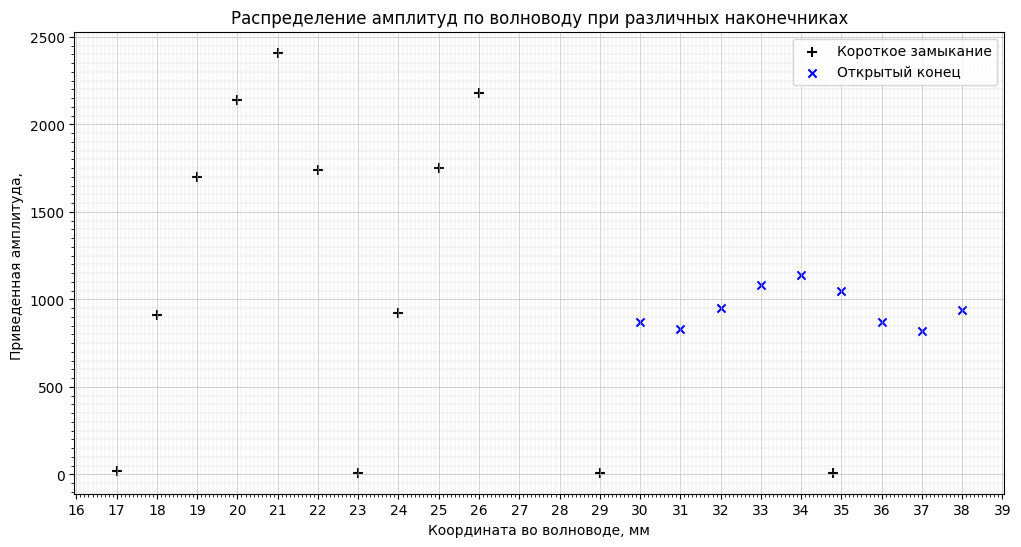

In [37]:
_, ax = polt.subplots(1, 1, figsize=(12, 6))

ax.scatter(np.array([list(experiment["tension_distribution"]["short_circuit"].keys())]),
           np.array([list(experiment["tension_distribution"]["short_circuit"].values())]),
           marker="+",
           s=45,
           label="Короткое замыкание",
           color="black")

ax.scatter(np.array([list(experiment["tension_distribution"]["open"].keys())]),
           np.array([list(experiment["tension_distribution"]["open"].values())]),
           marker="x",
           s=35,
           label="Открытый конец",
           color="blue")

ax.set_title("Распределение амплитуд по волноводу при различных наконечниках")
ax.set_ylabel("Приведенная амплитуда, ")
ax.set_xlabel("Координата во волноводе, мм")

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

In [38]:
k = (yp[1][5] / yp[1][1])**0.5
print(k)
ro = (k - 1) / (k + 1)
print(ro)

IndexError: index 5 is out of bounds for axis 0 with size 1

In [ ]:
n2 = 1 / ksvne
eps = n2**(-2)
eps

3.0799999999999996

[]

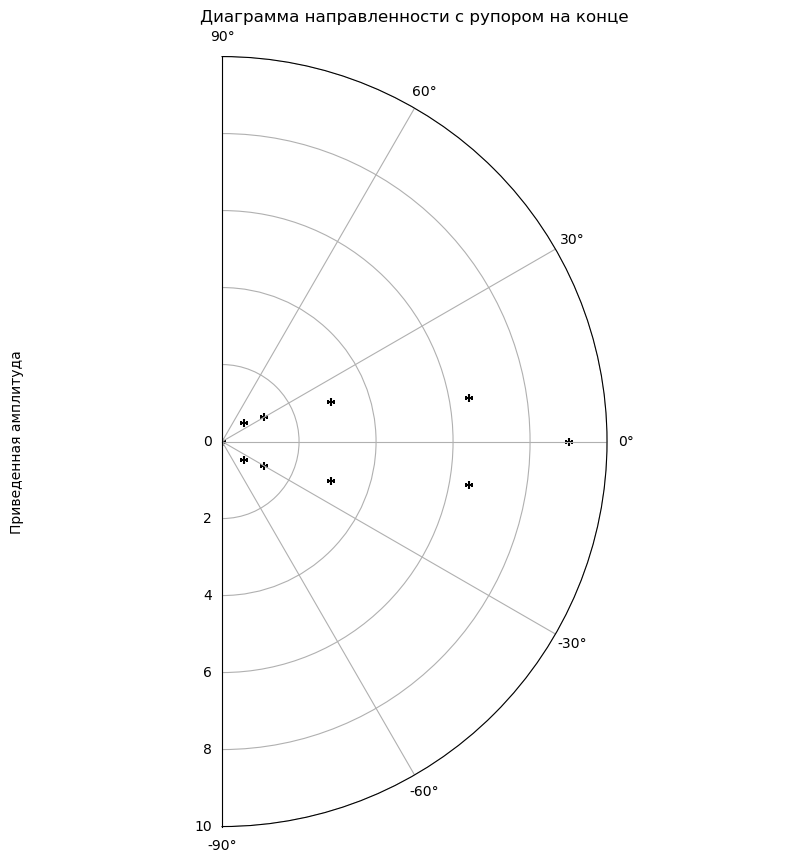

In [ ]:
theta = np.linspace(-np.pi / 2, np.pi / 2, 19)
r = np.array([0, 0, 0, 0, 0, 1.5, 2.5, 6, 13, 18, 13, 6, 2.5, 1.5, 0, 0, 0, 0, 0]) / 2
fig = polt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.scatter(theta, r, marker='+', color="black")
ax.set_title("Диаграмма направленности с рупором на конце")
ax.set_ylabel("Приведенная амплитуда")
ax.set_xlim(-np.pi / 2, np.pi / 2)
ax.set_ylim(0, 10)
polt.plot()

[]

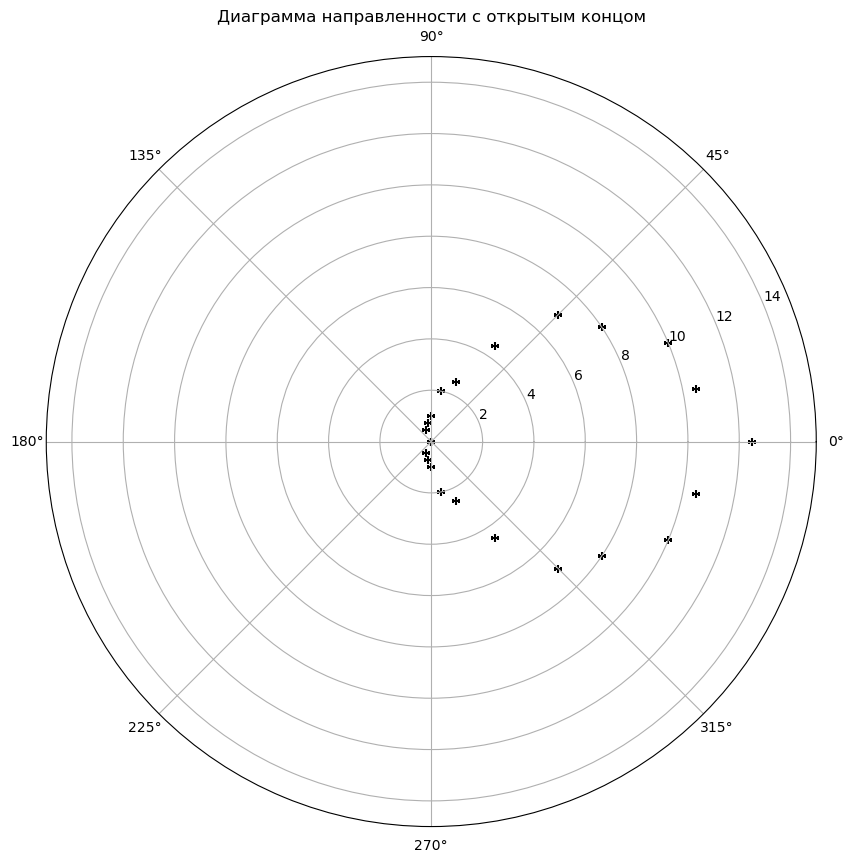

In [ ]:
theta = np.linspace(-np.pi / 4 * 3, np.pi / 4 * 3, 25)
r = np.array([0, 0, 1, 1.5, 2, 4, 5, 9, 14, 16, 20, 21, 25,
             21, 20, 16, 14, 9, 5, 4, 2, 1.5, 1, 0, 0]) / 2
fig = polt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.scatter(theta, r, marker='+', color="black")
ax.set_title("Диаграмма направленности с открытым концом")
# Setting the axis limit
ax.set_ylim(0, 15)
# Displaying the plot
polt.plot()

[]

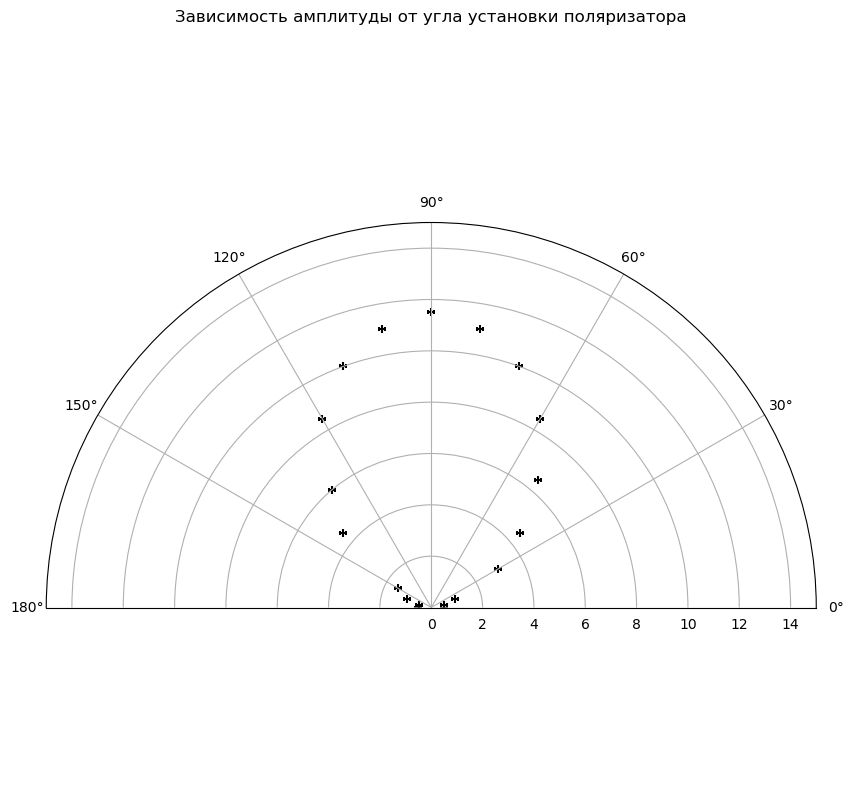

In [ ]:
theta = np.linspace(0, np.pi, 19)
r = np.array([1, 1, 2, 6, 9, 13, 17, 20, 22, 23, 22, 20, 17, 12, 9, 3, 2, 1, 1]) / 2
fig = polt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.scatter(theta, r, marker='+', color="black")
ax.set_title("Зависимость амплитуды от угла установки поляризатора")
# Setting the axis limit
ax.set_ylim(0, 15)
ax.set_xlim(0, np.pi)
# Displaying the plot
polt.plot()

In [ ]:
# Стоячая волна
nar = np.array([2.65, 11, 19.45, 27.9, 36.35])
sumar = 0
for i in range(1, 5):
  sumar += (nar[i] - nar[i - 1])
dsr = sumar / 4
lamba = dsr * 2
lamba

16.85

In [ ]:
def ks(amax, amin):
  k = (amax / amin)**0.5
  print(f"ksvn = {k}")
  ro = (k - 1) / (k + 1)
  print(f"ro = {ro}")


ks(yp[1][5], yp[1][1])
ks(yp[2][5], yp[2][1])
ks(yp[3][5], yp[3][10])

ksvn = 1.7549928774784245
ro = 0.2740453101168996
ksvn = 1.3416407864998738
ro = 0.14589803375031546
ksvn = 1.1428571428571428
ro = 0.06666666666666664


In [ ]:
d = 27
fi = lamba / d
print(np.rad2deg(fi / 2))

17.87840527398958


In [ ]:
# Интерф Майкельсона
nar = np.array([8.35, 14, 19.4, 24.9, 30.35, 36])
sumar = 0
for i in range(1, 5):
  sumar += (nar[i] - nar[i - 1])
dsr = sumar / 4
lamba = dsr * 2
lamba

11.0

In [ ]:
# показатель преломления
n = 1.35 / (2 * 1.68) + 1
n

1.4017857142857144